# Part 2

In [23]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [24]:
# importing data from part 1
data = pd.read_parquet('../training_data/rice_feature_data.parquet')

In [25]:
data.head()

mean_b       var_b    skew_b    kurt_b    entr_b      mean_g  \
0  234.887380  355.347614 -0.553562 -0.656321  5.263077  230.505217   
1  217.458704   82.110749 -0.028677  2.413071  5.120533  204.133926   
2  226.921111  111.567639 -0.474308  0.647867  5.384632  216.544897   
3  233.894178  239.658145 -1.524592  2.450121  5.489109  231.712360   
4  208.110291  224.030886 -0.940787  0.363133  5.547121  208.928796   

        var_g    skew_g    kurt_g    entr_g  ...    kurt_r    entr_r  \
0  477.841226 -0.400259 -0.966816  5.506168  ... -0.977245  5.555513   
1   83.481241  0.081193  2.053817  5.156789  ...  2.228074  5.128429   
2  122.179148 -0.672709  0.767762  5.407488  ...  0.750525  5.396245   
3  293.609549 -1.386229  1.658084  5.552210  ...  1.618729  5.642129   
4  255.065451 -0.964120  0.253140  5.582591  ...  0.247824  5.581644   

   major_axis_length  minor_axis_length    area   perimeter  roundness  \
0         138.844086          66.395470  7150.0  361.847760   0.686221   
1         129.027618          62.808922  6220.0  324.936073   0.740294   
2         130.407501          60.895866  6017.0  331.137083   0.689563   
3         133.773544          68.909790  7129.5  356.492421   0.704966   
4         137.687790          69.746933  7476.5  362.007140   0.716925   

   aspect_ratio  class  class_int  
0      2.091168    Arb          0  
1      2.054288    Arb          0  
2      2.141484    Arb          0  
3      1.941285    Arb          0  
4      1.974105    Arb          0  

[5 rows x 23 columns]

## Data exploration 

- Standardize the data
- Plot a boxplot of each feature
- Plot histogram of each feature, use a different color for each class
- Plot pairplot (each feature against each feature and the label against each feature)
- Discuss your findings from the above figures, e.g. can you spot features which might be very useful in predicting the correct class? 
- Fit PCA using two components
- Plot the PCA figure with two components, color the data points according to their species
- Can you see any clusters in PCA? Does this figure give you any clues, how well you will be able to classify the image types? Explain.
- How many PCA components are needed to cover 99% of the variance?
- Make clear figures, use titles and legends for clarification

In [26]:
# Standardize the data

# extract the labels
labels = data.iloc[:, -2:]

# extract the numerical features
features = data.iloc[:, :-2]

# standardize the features
scaler = StandardScaler()
standardized_features = scaler.fit_transform(features)

# create a new data frame with standardized features and labels
standardized_df = pd.DataFrame(standardized_features, columns=features.columns)
standardized_df = pd.concat([standardized_df, labels], axis=1)

In [27]:
standardized_df.head()

mean_b     var_b    skew_b    kurt_b    entr_b    mean_g     var_g  \
0  0.396251  2.681051  0.059767 -0.731612  0.322262  1.161240  3.412727   
1 -0.971039 -0.533707  0.562167 -0.171077  0.068750 -1.381600 -1.005674   
2 -0.228707 -0.187133  0.135625 -0.493440  0.538448 -0.184878 -0.572103   
3  0.318334  1.319911 -0.869668 -0.164311  0.724261  1.277638  1.348599   
4 -1.704427  1.136049 -0.310871 -0.545439  0.827434 -0.919257  0.916752   

     skew_g    kurt_g    entr_g  ...    kurt_r    entr_r  major_axis_length  \
0 -0.367326 -0.806359  0.201358  ... -0.925652  0.306781          -0.839521   
1  0.225577  0.161922 -0.585434  ...  0.407264 -0.812907          -1.115487   
2 -0.702846 -0.250330 -0.020867  ... -0.207167 -0.110771          -1.076695   
3 -1.581537  0.035068  0.305043  ...  0.153871  0.533864          -0.982067   
4 -1.061714 -0.415295  0.373460  ... -0.416213  0.375291          -0.872028   

   minor_axis_length      area  perimeter  roundness  aspect_ratio  class  \
0           0.941032  0.136762  -0.533615   0.994183     -1.046037    Arb   
1           0.622454 -0.518992  -1.186728   1.493185     -1.080946    Arb   
2           0.452525 -0.662130  -1.077008   1.025026     -0.998410    Arb   
3           1.164369  0.122308  -0.628372   1.167168     -1.187910    Arb   
4           1.238729  0.366982  -0.530795   1.277529     -1.156844    Arb   

   class_int  
0          0  
1          0  
2          0  
3          0  
4          0  

[5 rows x 23 columns]

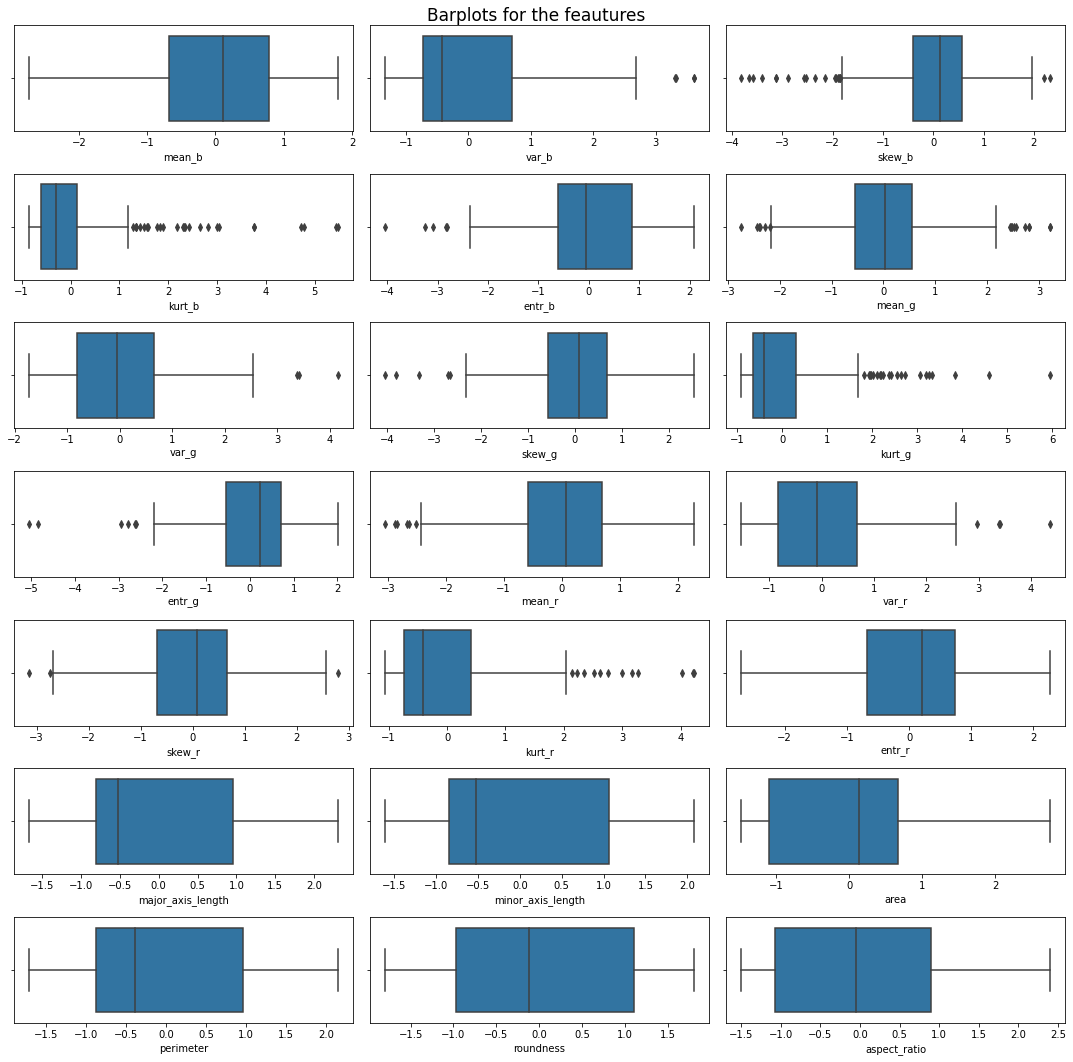

In [28]:
# Plot a boxplot of each feature

n_rows=7
n_cols=3
# Creating the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize= (15, 15))

for i, column in enumerate(features.columns):
    sns.boxplot(x = standardized_df[column],ax=axes[i//n_cols,i%n_cols])
    
fig.suptitle("Barplots for the feautures",fontsize=17)    
plt.tight_layout()

The above plot is a useful way to quickly visualize the distribution of data across multiple features or variables. We can notice that the majority of Color features show the existence of outliers. And considering that we visualized the boxplots for the standardize feaures it wouldn't make sense to compare the boxes of different features to get a sense of which features have a wider or narrower range of values, as all the features are now centered around 0.

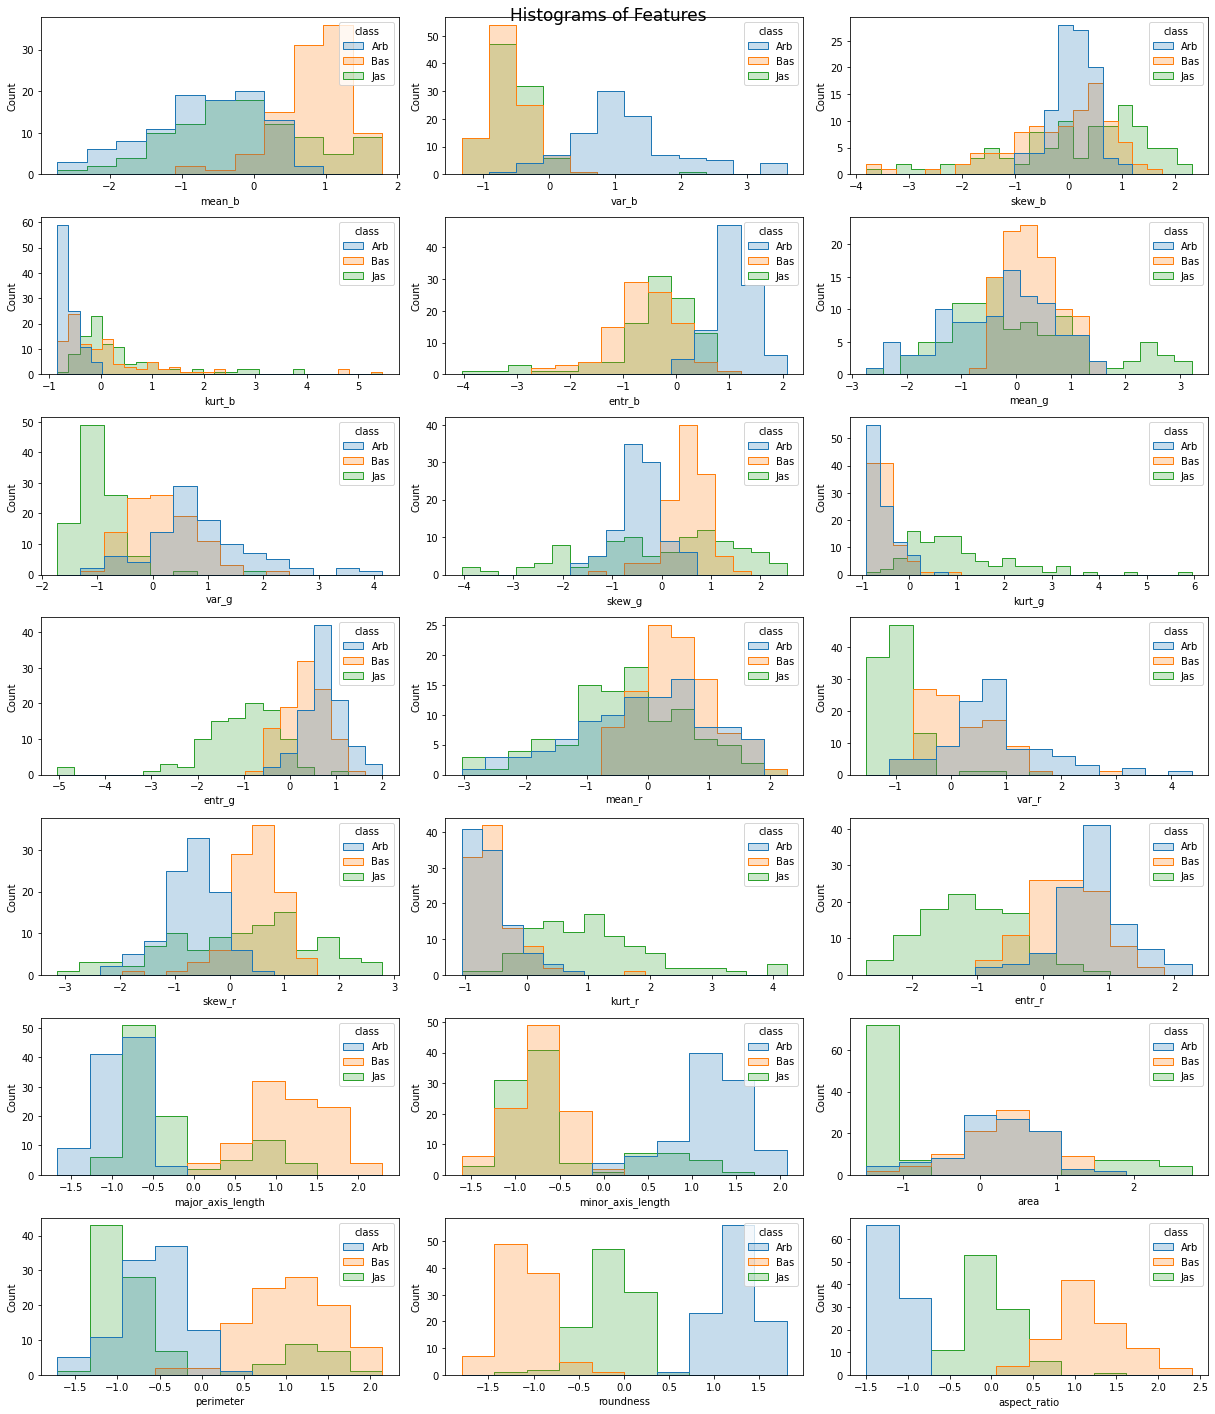

In [29]:
# Plot histogram of each feature, use a different color for each class
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(17, 20))

for i, column in enumerate(features.columns):
    sns.histplot(data=standardized_df, x=column, hue='class', kde=False, element='step', ax=axs[i//n_cols,i%n_cols])

fig.suptitle('Histograms of Features', fontsize=17) 
plt.tight_layout()

By comparing the above histograms for each class, we can identify the differences and similarities in the distribution of the data between the three classes. For example, we can notice that for features such as roundness and aspect_ratio the class distributions have higher frequency of data points in particular ranges of values, meaning that values of these features can clearly separate between the classes, this might be an early indicator of features with high prediction importance. While for other features, the separation between the class data distributions becomes more blurry, meaning that while these features hold high importance in representing the information in the data, they might not show clear differences between the classes.

Text(0.5, 1.0, 'Pairplot')

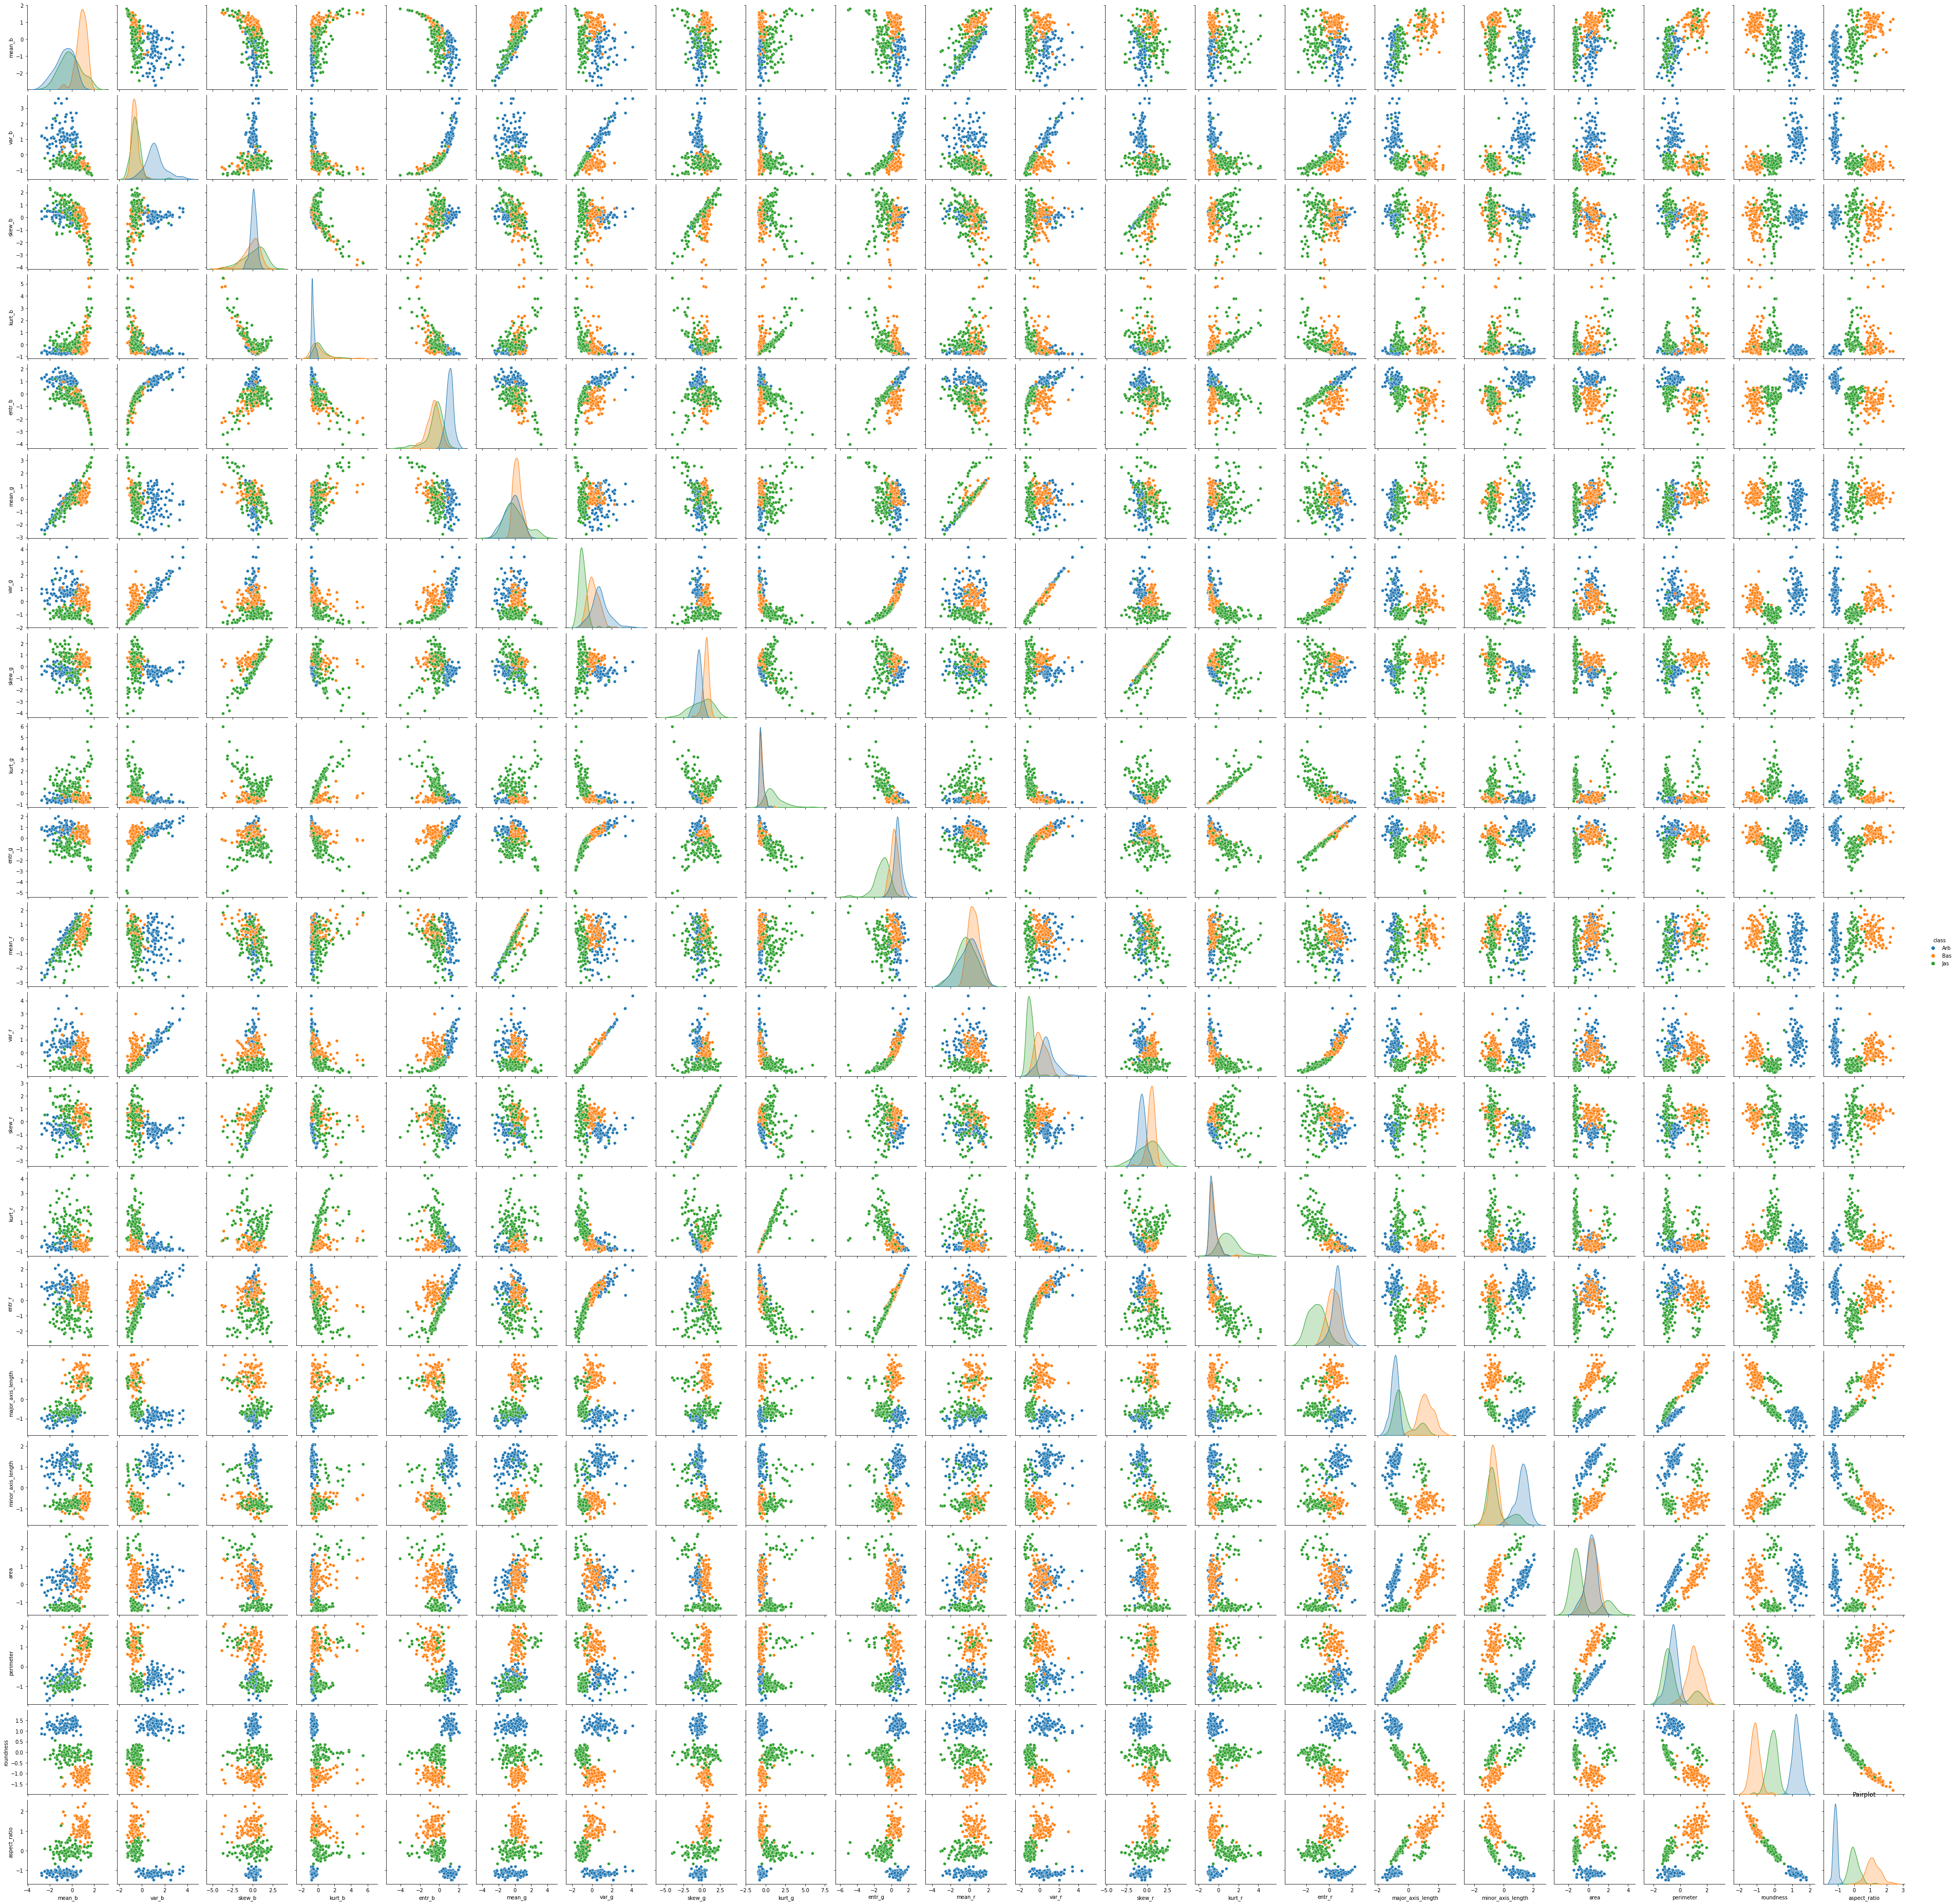

In [30]:
# Plot pairplot
sns.pairplot(standardized_df.iloc[:, :-1], hue='class')
plt.title('Pairplot')

With a total of 21 features, it becomes quite challenging to derive insights from the pairplot, however, we can clearly see that some data features show a linear relationship, such as roundness and aspect ratio, as well as some color features such as skewness and kurtosis, while other features like entropy show some sort of exponential relationship with the mean and variance of the color channels.

- **Can you spot features which might be very useful in predicting the correct class?**
<br> Based on the previous analysis we can assume that features like roundness and aspect ratio can be very useful in predicting the correct class, this, however, remains as an early judgment and it's important to test our models for feature importance.

In [31]:
# Fit PCA using two components

pca = PCA(n_components=2)
x = standardized_features
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])
principalDf[['class','class_int']] = standardized_df[['class','class_int']]

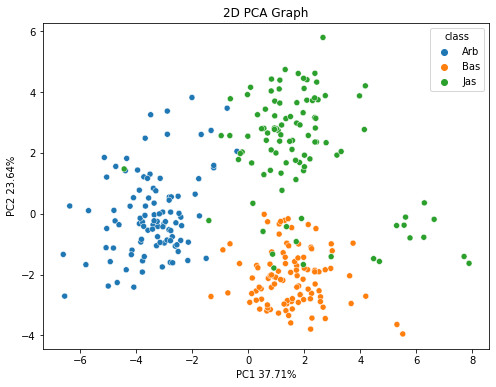

In [32]:
# Plot the PCA figure with two components, color the data points according to their species
explained_var = pca.explained_variance_ratio_ * 100

plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=principalDf, x='PC1', y='PC2', hue='class')
ax.set(xlabel='PC1 {0:.2f}%'.format(explained_var[0]), ylabel='PC2 {0:.2f}%'.format(explained_var[1]))
plt.title('2D PCA Graph')
plt.show()

- **Can you see any clusters in PCA? Does this figure give you any clues, how well you will be able to classify the image types? Explain?**
<br> We can clearly see the presence of clusters in the 2D PCA representation of the data corresponding to the data classes, and this can suggest that there are underlying factors or variables that are driving the pattern of variation in the data. In our case this might suggest that there are differences in the feature values between the three species, and can be a positive indication that a classification model could potentially be developed using the features extracted from the images.

In [33]:
# How many PCA components are needed to cover 99% of the variance?

pca = PCA().fit(x)
# get the cumulative sum of the explained variance ratio
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# find the index of the first component that explains at least 99% of the variance
n_components = np.argmax(cumulative_variance >= 0.99) + 1

print(f"{n_components} PCA components are needed to explain 99% of the variance.")

11 PCA components are needed to explain 99% of the variance.


## Model selection 

Select the best model for each classifier. Use 5-fold repeated cross validation with 3 repetitions (*RepeatedKFold* from sklearn). You can choose the hyperparameter ranges to use (i.e. from which values the best hyperparameters are selected if they are not stated below.) <br>

- k Nearest Neighbors classifier: hyperparameter k
- random forest: hyperparameters max_depth and max_features
- MLP: use one hidden layer and Early stopping. Hyperparameters:
    - number of neurons in the hidden layer
    - activation function: logistic sigmoid function and rectified linear unit function
    - solver: stochastic gradient descent and adam
    - validation_fraction: 0.1 and 0.5

For each classifier:
- Report the best hyperparameter or the best combination of hyperparameters. <br>
- Plot the accuracy versus the hyperparameter/hyperparameter combination and highlight the best value. <br>

For random forest model, report the feature importance for each feature. Which features seem to be the most important? Does this correspond with the observations you made in the data exploration? <br>
Ponder the model selection process. What things should be considered when selecting the model to be used?

In [34]:
X = standardized_features
y = data['class_int']

### k Nearest Neighbors classifier: hyperparameter k

In [35]:
knn = KNeighborsClassifier()

# specify the hyperparameter grid to search over
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

# create a RepeatedKFold object with 5 folds and 3 repetitions
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123)

# perform the grid search
grid_search = GridSearchCV(knn, param_grid, cv=rkf, n_jobs=-1, verbose=1, scoring='accuracy', 
                           return_train_score=True)

# fit the grid search to the data
grid_search.fit(X, y)

# print the best hyperparameters and corresponding mean cross-validation score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Fitting 15 folds for each of 30 candidates, totalling 450 fits
Best hyperparameters:  {'n_neighbors': 3}
Best cross-validation score:  0.9922222222222222


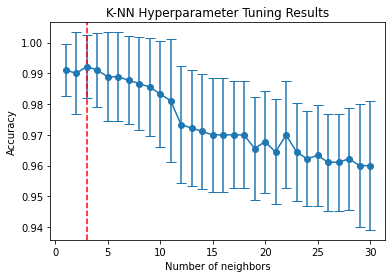

In [36]:
# extract the hyperparameters and mean cross-validation scores from the GridSearchCV object
hyperparams = grid_search.cv_results_['params']
scores = grid_search.cv_results_['mean_test_score']

# extract the best hyperparameters from the GridSearchCV object
best_hyperparams = grid_search.best_params_

# extract the index of the best hyperparameters in the list of hyperparameters
best_hyperparams_idx = hyperparams.index(best_hyperparams)

# create a list of hyperparameter values to use for the x-axis of the plot
hyperparam_values = [params['n_neighbors'] for params in hyperparams]

# create a line plot with error bars
plt.errorbar(hyperparam_values, scores, yerr=grid_search.cv_results_['std_test_score'],
             fmt='o-', capsize=5)

# add a vertical line to highlight the best hyperparameter value
plt.axvline(x=best_hyperparams['n_neighbors'], color='r', linestyle='--')

# add labels and a title to the plot
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('K-NN Hyperparameter Tuning Results')
plt.show()


### Random forest: hyperparameters max_depth and max_features

In [42]:
# create a random forest classifier
rf = RandomForestClassifier()

# define the parameter grid to search over
param_grid = {
    'max_depth': [5, 10, 15], 
    'max_features': ['sqrt', 'log2']
}


# create a RepeatedKFold object with 5 folds and 3 repetitions
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123)

# perform the grid search
grid_search = GridSearchCV(rf, param_grid, cv=rkf, n_jobs=-1, verbose=1, scoring='accuracy', 
                           return_train_score=True)

# fit the grid search to the data
grid_search.fit(X, y)

# print the best hyperparameters and corresponding mean cross-validation score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Fitting 15 folds for each of 6 candidates, totalling 90 fits
Best hyperparameters:  {'max_depth': 15, 'max_features': 'log2'}
Best cross-validation score:  0.9866666666666665


In [38]:
# Report feature importance

best_rf = grid_search.best_estimator_
feature_importances = best_rf.feature_importances_

# Print the feature importances
for i, feature_importance in enumerate(feature_importances):
    print(f'Feature {i+1}: {feature_importance:.4f}')

Feature 1: 0.0263
Feature 2: 0.0310
Feature 3: 0.0024
Feature 4: 0.0018
Feature 5: 0.0635
Feature 6: 0.0048
Feature 7: 0.0248
Feature 8: 0.0080
Feature 9: 0.0655
Feature 10: 0.0333
Feature 11: 0.0053
Feature 12: 0.0316
Feature 13: 0.0113
Feature 14: 0.0492
Feature 15: 0.0305
Feature 16: 0.0727
Feature 17: 0.0595
Feature 18: 0.0223
Feature 19: 0.0577
Feature 20: 0.2063
Feature 21: 0.1924


- **Which features seem to be the most important? Does this correspond with the observations you made in the data exploration?**
<br> From the results above we can conclude that the feautures with the most importance are features 20 and 21 (roundness and aspect_ratio) as they are the only features with an importance greater than 0.15. And this confirms our early observations made in the data exploration. 

0.9856 0.9844 
0.9833 0.9822 
0.9822 0.9867 


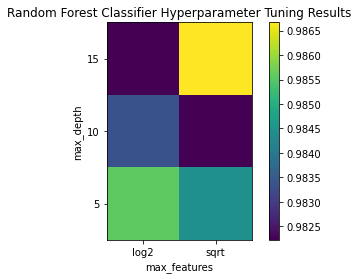

In [55]:
# extract the results of the grid search
results = grid_search.cv_results_
mean_scores = results['mean_test_score']
params = results['params']

# extract the values of the hyperparameters to plot against
max_depth_values = [param['max_depth'] for param in params]
max_features_values = [param['max_features'] for param in params]

# create a 2D grid of mean scores for each hyperparameter combination
grid_size = len(set(max_depth_values)) * len(set(max_features_values))
score_grid = np.reshape(mean_scores, (len(set(max_depth_values)), len(set(max_features_values))))

# plot the mean cross-validation score for each hyperparameter combination
plt.imshow(score_grid, cmap='viridis')
plt.colorbar()
plt.xticks(np.arange(len(set(max_features_values))), sorted(set(max_features_values)))
plt.yticks(np.arange(len(set(max_depth_values))), sorted(set(max_depth_values)))
plt.xlabel('max_features')
plt.ylabel('max_depth')
plt.title('Random Forest Classifier Hyperparameter Tuning Results')
plt.gca().invert_yaxis()

# find the best hyperparameters and highlight the corresponding cell in the plot

max_score = np.max(score_grid)

# Determine the location of the highest value in the score grid
max_index = np.where(score_grid == max_score)

# Highlight the highest value in the score grid using a different color or format
for i, row in enumerate(score_grid):
    for j, score in enumerate(row):
        if score == max_score:
            print('\033[1m\033[32m' + f'{score:.4f}' + '\033[0m', end=' ')
        else:
            print(f'{score:.4f}', end=' ')
    print()

plt.show()


### MLP: use one hidden layer and Early stopping

In [40]:
# define the hyperparameters to search
param_grid = {
    'hidden_layer_sizes': [(n,) for n in range(10, 110, 10)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'validation_fraction': [0.1, 0.5],
}

# define the MLP classifier
mlp_clf = MLPClassifier(early_stopping=True, random_state= 123)

# create a RepeatedKFold object with 5 folds and 3 repetitions
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123)

# perform grid search
grid_search = GridSearchCV(mlp_clf, param_grid, cv=rkf, n_jobs=-1, verbose=1, scoring='accuracy', 
                           return_train_score=True)

# fit the grid search to the data
grid_search.fit(X, y)

# print the best hyperparameters and corresponding mean cross-validation score
print('Best hyperparameters:', grid_search.best_params_)
print('Best cross-validation score:', grid_search.best_score_)

Fitting 15 folds for each of 80 candidates, totalling 1200 fits
Best hyperparameters: {'activation': 'relu', 'hidden_layer_sizes': (40,), 'solver': 'adam', 'validation_fraction': 0.5}
Best cross-validation score: 0.9733333333333333


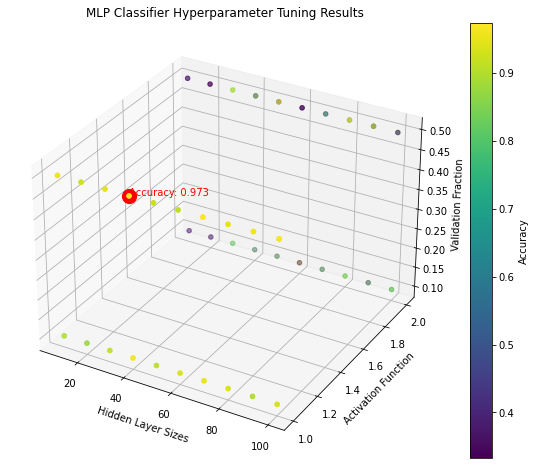

In [41]:
# Get the mean accuracy of each hyperparameter combination
mean_scores = grid_search.cv_results_['mean_test_score']

# Get the hyperparameter combinations used
params = grid_search.cv_results_['params']

# Create a mapping from string values to numerical values for the activation function
activation_mapping = {'relu': 1, 'logistic': 2}
solver_mapping = {'adam': 1, 'sgd': 2}

# Create a list of the unique values for each hyperparameter
hidden_layer_sizes_values = [p['hidden_layer_sizes'][0] for p in params]
activation_values = [activation_mapping[p['activation']] for p in params]
solver_values = [solver_mapping[p['solver']] for p in params]
validation_fraction_values = [p['validation_fraction'] for p in params]

# Plot the accuracy versus the hyperparameter combination
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(hidden_layer_sizes_values, activation_values, validation_fraction_values, c=mean_scores, cmap='viridis')
ax.set_xlabel('Hidden Layer Sizes')
ax.set_ylabel('Activation Function')
ax.set_zlabel('Validation Fraction')
ax.set_title('MLP Classifier Hyperparameter Tuning Results')

# Find the best hyperparameters and their corresponding accuracy
best_index = grid_search.best_index_
best_params = params[best_index]
best_score = mean_scores[best_index]

# Highlight the best hyperparameters and corresponding accuracy in the plot
best_hls = best_params['hidden_layer_sizes'][0]
best_activation = activation_mapping[best_params['activation']]
best_solver = solver_mapping[best_params['solver']]
best_vf = best_params['validation_fraction']
ax.scatter(best_hls, best_activation, best_vf, c='red', marker='o', s=200)
ax.text(best_hls, best_activation, best_vf, f'Accuracy: {best_score:.3f}', color='red')

# Add a colorbar to the plot
cbar = plt.colorbar(sc)
cbar.set_label('Accuracy')

plt.show()

- **Ponder the model selection process. What things should be considered when selecting the model to be used?**

<br> When selecting a model, it's important to consider a number of factors, including:


- Model assumptions: Each model makes certain assumptions about the underlying data. It's important to consider whether these assumptions are reasonable for our data, as violating these assumptions can lead to inaccurate or unreliable results.
- Model complexity: A more complex model can fit the data better, but it may also be more prone to overfitting or be more computationally expensive to train and run. It's important to find a balance between model complexity and accuracy.
- Interpretability: While using complex models can be very tempting as it produces higher accuracy, certain models such as neural networks can work as a black box and are less interpretable than other models. So depending on the context, interpretability may be an important factor to consider. In our case, since we are working with image data, it would be a good idea to make use of these complex models, but this obviously wouldn't hold for other use cases.
- Performance metrics: Different models can be evaluated using different performance metrics, such as accuracy, precision, recall, or F1 score. The choice of metric will depend on the specific problem and the goals of the analysis, but it's always an important indicator of which model works the best for our data.

<br> By taking these factors into account, we can choose a model that is well-suited to the problem at hand and can deliver accurate and reliable results.
